# Módulos

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import copy
import random
import matplotlib.pyplot as plt

In [2]:
from logistica.componentes.camion import Camion
from logistica.componentes.pedido import Pedido
from logistica.componentes.ruteo import Ruteo
from logistica.utils import preparar_df_pedidos

# Datos

In [3]:
df_clientes = pd.read_excel("data/inputs/data_inputs.xlsx", sheet_name="clientes")
df_pedidos = pd.read_excel("data/inputs/data_inputs.xlsx", sheet_name="pedidos")
df_pedidos = pd.merge(left=df_pedidos, right=df_clientes, on="cliente", how="inner")
df_pedidos

,cliente,pedidos1,pedidos2,pedidos3,pedidos4,pedidos5,pedidos6,coord_x,coord_y
0,A,4,3,5,2,6,6,0.257571,1.803726
1,B,6,6,5,4,1,3,1.523313,2.102301
2,C,1,6,6,2,6,7,0.710910,2.629800
3,D,8,6,5,2,8,2,1.013940,2.149740
4,E,4,1,2,4,2,3,0.609480,0.666810
5,F,3,1,6,8,6,5,0.998640,1.451790
6,G,3,2,3,7,4,3,1.434510,0.018180
7,H,5,8,5,2,4,8,2.171880,0.764910
8,I,5,2,3,4,2,6,1.412280,0.863190
9,J,1,8,6,8,1,2,2.386260,1.387260


In [4]:
df_camiones = pd.read_excel("data/inputs/data_inputs.xlsx", sheet_name="camiones")
df_camiones

,camion,carga_max,pedidos_max,dist_max
0,1,12,3,2
1,2,12,3,2
2,3,12,3,2
3,4,12,3,2
4,5,12,3,2
5,6,12,3,2


# Ruteo

In [23]:
# Preparamos los datos de pedidos.
df_pedido = preparar_df_pedidos(df_pedidos, "pedidos3")
df_pedido

,cliente,pedidos,coord_x,coord_y
0,A,5,0.257571,1.803726
1,B,5,1.523313,2.102301
2,C,6,0.710910,2.629800
3,D,5,1.013940,2.149740
4,E,2,0.609480,0.666810
5,F,6,0.998640,1.451790
6,G,3,1.434510,0.018180
7,H,5,2.171880,0.764910
8,I,3,1.412280,0.863190
9,J,6,2.386260,1.387260


In [16]:
ruteo = Ruteo(df_camiones, df_pedido, costo_oportunidad=3000, presupuesto=1200, random_state=42)

In [19]:
camiones = [1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6, 6]
pedidos = ["F", "E", "G", "B", "I", "J", "H", "K", "L", "C", "A", "D"]


for ix_c, ix_p in zip(camiones, pedidos):
    ruteo.get_camion(ix_c).add_pedido_checked(ruteo.get_pedido(ix_p))
    
ruteo.get_camiones()
ruteo.get_results()

In [24]:
ruteo = Ruteo(df_camiones, df_pedido, costo_oportunidad=3000, presupuesto=1200, random_state=42)

In [25]:
ruteo.get_solucion_inicial(mode="random")

In [26]:
ruteo.get_camiones()

[Camión 1
 Carga Total 5 tn
 Pedidos ['H']
 Costo Total 7000
 Costo por tn 1400.0,
 Camión 2
 Carga Total 7 tn
 Pedidos ['E', 'A']
 Costo Total 8400
 Costo por tn 1200.0,
 Camión 3
 Carga Total 12 tn
 Pedidos ['F', 'C']
 Costo Total 12000
 Costo por tn 1000.0,
 Camión 4
 Carga Total 9 tn
 Pedidos ['G', 'K']
 Costo Total 10800
 Costo por tn 1200.0,
 Camión 5
 Carga Total 10 tn
 Pedidos ['B', 'D']
 Costo Total 10000
 Costo por tn 1000.0,
 Camión 6
 Carga Total 12 tn
 Pedidos ['I', 'J', 'L']
 Costo Total 12000
 Costo por tn 1000.0]

In [27]:
ruteo.get_pedidos()

[Pedido A
 Carga 5 tn
 Asignado True
 Asignado a Camion 2,
 Pedido B
 Carga 5 tn
 Asignado True
 Asignado a Camion 5,
 Pedido C
 Carga 6 tn
 Asignado True
 Asignado a Camion 3,
 Pedido D
 Carga 5 tn
 Asignado True
 Asignado a Camion 5,
 Pedido E
 Carga 2 tn
 Asignado True
 Asignado a Camion 2,
 Pedido F
 Carga 6 tn
 Asignado True
 Asignado a Camion 3,
 Pedido G
 Carga 3 tn
 Asignado True
 Asignado a Camion 4,
 Pedido H
 Carga 5 tn
 Asignado True
 Asignado a Camion 1,
 Pedido I
 Carga 3 tn
 Asignado True
 Asignado a Camion 6,
 Pedido J
 Carga 6 tn
 Asignado True
 Asignado a Camion 6,
 Pedido K
 Carga 6 tn
 Asignado True
 Asignado a Camion 4,
 Pedido L
 Carga 3 tn
 Asignado True
 Asignado a Camion 6]

In [28]:
ruteo.get_results()

--Resultados--
Carga Total 55 tn
Costo Camiones 60200 $
Costo Oportunidad 0 $
Costo Total 60200 $
Costo Total por tn 1094.55 $
Ahorro -8.790000000000001%


In [22]:
import time
import math
from tqdm import tqdm

In [53]:
random.seed(43)
best_sol, history = sa(ruteo, t_inicial=10, t_final=1, k=1, iters=10, prob=1)
#best_sol, history = ls_by_time(ruteo, n_vecinos=500, max_time=30, prob=0.5)

100%|██████████| 10/10 [00:00<00:00, 36.74it/s]


In [54]:
best_sol.get_results()

--Resultados--
Carga Total 55 tn
Costo Camiones 59000 $
Costo Oportunidad 0 $
Costo Total 59000 $
Costo Total por tn 1072.73 $
Ahorro -10.61%


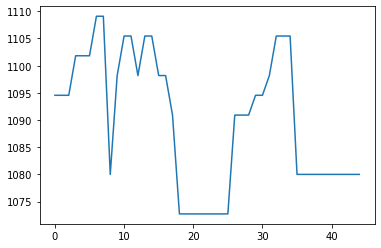

In [55]:
plt.plot(history["history_actual"])

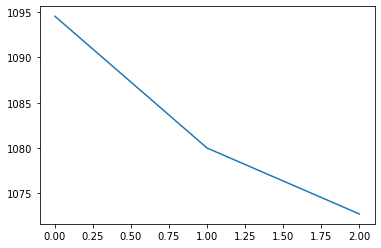

In [56]:
plt.plot(history["history_best"])

In [43]:
def sa(ruteo_inicial, t_inicial, t_final, k, iters, prob=1):
    start = time.time()
    
    best_solution = copy.deepcopy(ruteo_inicial)
    actual_solution = copy.deepcopy(ruteo_inicial)
    
    solution_history = {}
    solution_history["history_actual"] = []
    solution_history["history_best"] = [best_solution.costo_total_tn]
    
    temps = sorted([t for t in range(t_final, t_inicial+k, k)], reverse=True)
    #print(temps)
    
    for t in tqdm(temps):     
        for i in range(iters):
            new_solution = copy.deepcopy(actual_solution)
            new_solution.get_vecino(prob=prob)
            new_solution._set_results()
            
            if new_solution.costo_total_tn > actual_solution.costo_total_tn:
                delta = actual_solution.costo_total_tn - new_solution.costo_total_tn 
                #print(delta)
                #print(math.exp(delta/t))
                if math.exp(delta/t) > random.uniform(0,1):
                    actual_solution = copy.deepcopy(new_solution)
                    solution_history["history_actual"].append(actual_solution.costo_total_tn)
                
            else:
                actual_solution = copy.deepcopy(new_solution)
                solution_history["history_actual"].append(actual_solution.costo_total_tn)
                
            if actual_solution.costo_total_tn < best_solution.costo_total_tn:
                best_solution = copy.deepcopy(actual_solution)
                solution_history["history_best"].append(best_solution.costo_total_tn)
            
    
    end = time.time()
    solution_history["time"] = end-start
    
    return (best_solution, solution_history)
    

In [41]:
def ls(ruteo, n_vecinos, max_time=None, n_iter=None, func_value=None, prob=1):
    pass

def ls_by_time(ruteo_inicial, n_vecinos, max_time, prob=1):
  
    start = time.time()
    now = time.time()
    
    best_solution = copy.deepcopy(ruteo_inicial)
    solution_history = []
    
    while (now-start) < max_time:
        
        vecinos = [copy.deepcopy(best_solution)] * n_vecinos
        
        for vecino in vecinos:
            vecino.get_vecino(prob=prob)
            vecino._set_results()

            if vecino.costo_total_tn < best_solution.costo_total_tn:
                best_solution = copy.deepcopy(vecino)
                solution_history.append(best_solution.costo_total_tn)
        
        now = time.time()
        
    return (best_solution, solution_history)
    
    
    
    
def ls_by_iter(ruteo, n_vecinos, n_iter):
    start = time.time()
    
    best_solution = copy.deepcopy(ruteo_inicial)
    solution_history = []
    
    while (now-start) < max_time:
        
        vecinos = [copy.deepcopy(best_solution)] * n_vecinos
        
        for vecino in vecinos:
            vecino.get_vecino(prob=prob)
            vecino._set_results()

            if vecino.costo_total_tn < best_solution.costo_total_tn:
                best_solution = vecino
                solution_history.append(best_solution.costo_total_tn)
        
        now = time.time()
        
        end = time.time()
        
    return (best_solution, solution_history)
    

In [16]:
ruteo.get_vecino(prob=1)

In [17]:
ruteo.get_results()

--Resultados--
Carga Total 47 tn
Costo Camiones 56400 $
Costo Oportunidad 0 $
Costo Total 56400 $
Costo Total por tn 1200.0 $
Ahorro 0.0%


In [18]:
ruteo.get_camiones()

[Camión 1
 Carga Total 11 tn
 Pedidos ['A', 'B', 'C']
 Costo Total 11000
 Costo por tn 1000.0,
 Camión 2
 Carga Total 12 tn
 Pedidos ['D', 'E']
 Costo Total 12000
 Costo por tn 1000.0,
 Camión 3
 Carga Total 11 tn
 Pedidos ['F', 'G', 'H']
 Costo Total 11000
 Costo por tn 1000.0,
 Camión 4
 Carga Total 6 tn
 Pedidos ['I', 'J']
 Costo Total 8400
 Costo por tn 1400.0,
 Camión 5
 Carga Total 6 tn
 Pedidos ['L']
 Costo Total 8400
 Costo por tn 1400.0,
 Camión 6
 Carga Total 1 tn
 Pedidos ['K']
 Costo Total 5600
 Costo por tn 5600.0]